## Privacy Protection 🕵️

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt

### 1. Read Image

In [2]:
# 1. Open the image
image = imread('group_image.jpg')

### 2. Display Image

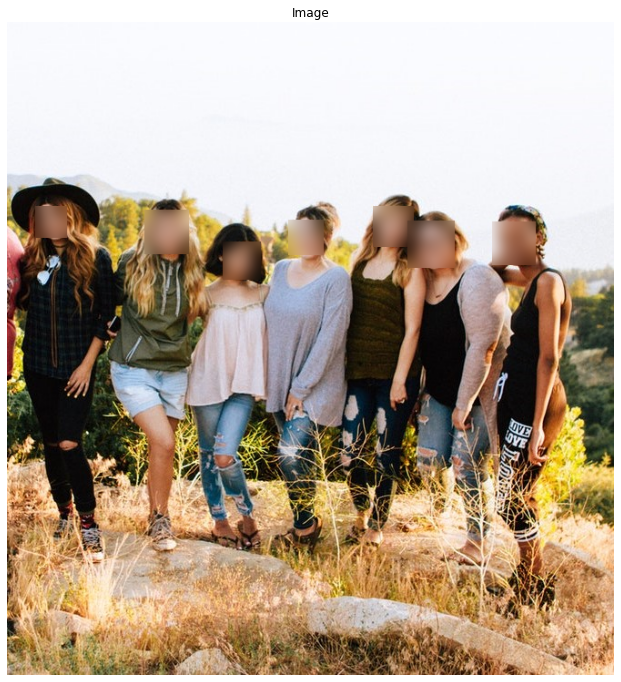

In [13]:
# 2. show image
def show_image(image, title='Image', cmap_type='gray'):
    plt.figure(figsize=(20,12))
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()
show_image(image)

### 3. Face Detection Classifier

In [4]:
from skimage import data

# import the classifier class
from skimage.feature import Cascade

# load the trained file from the module
trained_file = data.lbp_frontal_face_cascade_filename()

# initialize the detector cascade
detector = Cascade(trained_file)

### 4. Detect Faces

In [5]:
# Detect the faces
detected = detector.detect_multi_scale(img=image, scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10), max_size=(100, 100))

In [6]:
len(detected)

7

### 5. Blur Detected faces

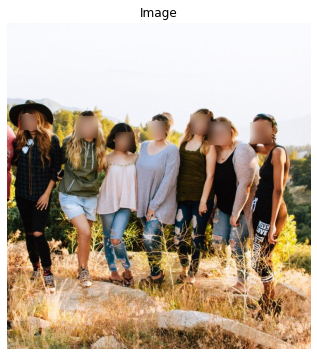

In [8]:
from skimage.filters import gaussian

# For each detected face
for d in detected:
    # Obtain the face rectangle from detected coordinates
    face = getFaceRectangle(image, d)
    
    # Apply gaussian filter to extracted face
    blurred_face = gaussian(face, channel_axis=2, sigma=8, preserve_range=True)
    
    # Merge this blurry face to our final image and show it
    resulting_image = mergeBlurryFace(image, blurred_face)

show_image(resulting_image)

### Helper functions

In [7]:
def getFaceRectangle(image, d):
    ''' Extracts the face from the image using the coordinates of the detected image '''
    # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    # Extract the detected face
    face= image[ x:width, y:height]
    return face

def mergeBlurryFace(original, gaussian_image):
     # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    original[ x:width, y:height] = gaussian_image
    return original

Follow me @itsafiz for more Python and ML content. 

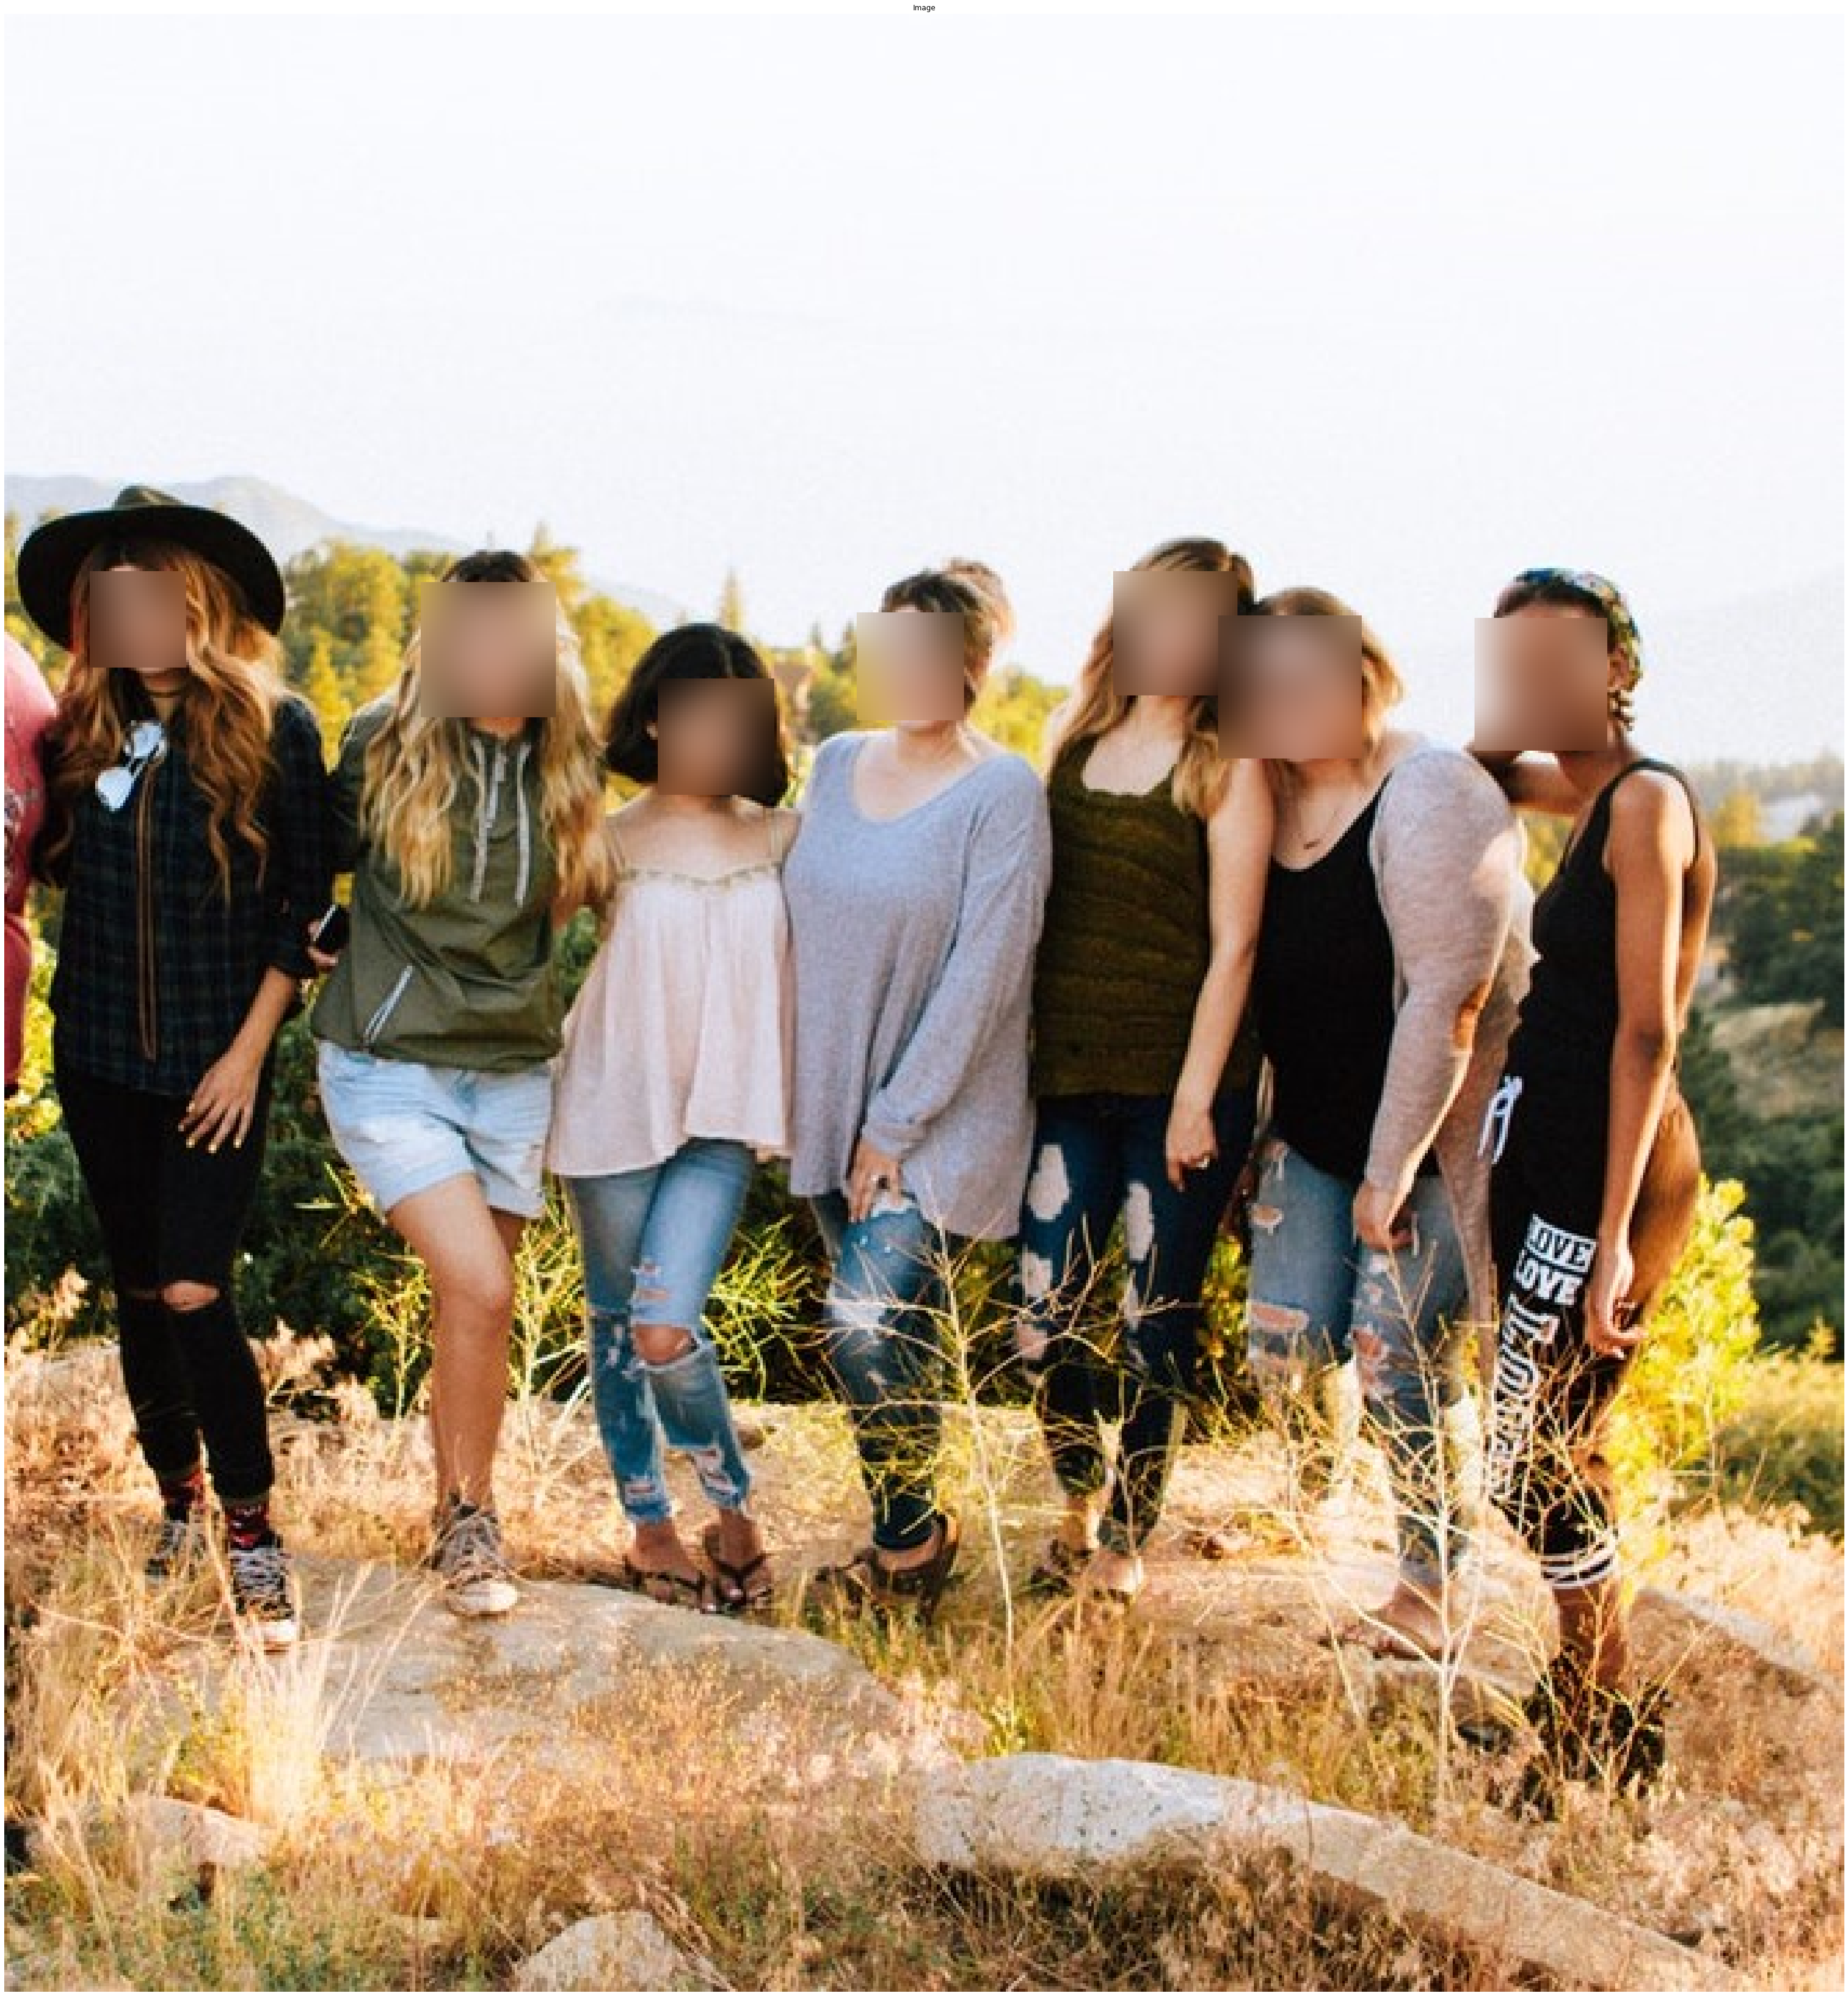

In [10]:
show_image(resulting_image)